# Excercise: MNIST Digits

```
Integrante 1: <>
Integrante 2: <>
Integrante 3: <>
```

[MNIST digits](http://yann.lecun.com/exdb/mnist/) is a dataset of written digits composed of 70000 black and white images. This dataset is a classic amongst people learning to apply machine learning models, specifically to pattern/image recognition. Of the 70K images, 60K are labeled examples and 10K are a validation set. These images are preprocessed so that they may be easily experimented with using machine learning.

Lets load a downsized version of this dataset from the scikit-learn package.

In [1]:
from sklearn.datasets import load_digits


This imports a function that will be used to load the digits. This particular version has 1797 images and each one has been downscaled to 8x8, as opposed to the original size of 28x28.

In [2]:
digits, target = load_digits(return_X_y=True)

def describe_ndarray(ndarr):
  print(f'Type: {type(ndarr)}')
  print(f'Dimensions: {ndarr.ndim}')
  print(f'Size: {ndarr.size}')
  print(f'Shape: {ndarr.shape}')
  print(f'Type: {ndarr.dtype.name}')
  print(f'Item size: {ndarr.itemsize}')
  print()

describe_ndarray(digits)
describe_ndarray(target)

Type: <class 'numpy.ndarray'>
Dimensions: 2
Size: 115008
Shape: (1797, 64)
Type: float64
Item size: 8

Type: <class 'numpy.ndarray'>
Dimensions: 1
Size: 1797
Shape: (1797,)
Type: int32
Item size: 4



Here we can see that we have two ndarrays, the first contains 1797 arrays of 64 (flattened 8x8 image) and the second has 1797 numbers, which correspond to the label of the digit. Lets try to visualize this.

In [3]:
print(digits[:4,])
print(target[:4,])

[[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
  15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
   0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
   0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]
 [ 0.  0.  0. 12. 13.  5.  0.  0.  0.  0.  0. 11. 16.  9.  0.  0.  0.  0.
   3. 15. 16.  6.  0.  0.  0.  7. 15. 16. 16.  2.  0.  0.  0.  0.  1. 16.
  16.  3.  0.  0.  0.  0.  1. 16. 16.  6.  0.  0.  0.  0.  1. 16. 16.  6.
   0.  0.  0.  0.  0. 11. 16. 10.  0.  0.]
 [ 0.  0.  0.  4. 15. 12.  0.  0.  0.  0.  3. 16. 15. 14.  0.  0.  0.  0.
   8. 13.  8. 16.  0.  0.  0.  0.  1.  6. 15. 11.  0.  0.  0.  1.  8. 13.
  15.  1.  0.  0.  0.  9. 16. 16.  5.  0.  0.  0.  0.  3. 13. 16. 16. 11.
   5.  0.  0.  0.  0.  3. 11. 16.  9.  0.]
 [ 0.  0.  7. 15. 13.  1.  0.  0.  0.  8. 13.  6. 15.  4.  0.  0.  0.  2.
   1. 13. 13.  0.  0.  0.  0.  0.  2. 15. 11.  1.  0.  0.  0.  0.  0.  1.
  12. 12.  1.  0.  0.  0.  0.  0.  1. 10.  8.  0.  0.  0.

These are the first 3 digits, but it's difficult to see the image and verify if they match the labels, lets reshape the data and try again.

In [4]:
digits_square = digits.reshape(-1, 8, 8)

print(digits_square[:5,])

[[[ 0.  0.  5. 13.  9.  1.  0.  0.]
  [ 0.  0. 13. 15. 10. 15.  5.  0.]
  [ 0.  3. 15.  2.  0. 11.  8.  0.]
  [ 0.  4. 12.  0.  0.  8.  8.  0.]
  [ 0.  5.  8.  0.  0.  9.  8.  0.]
  [ 0.  4. 11.  0.  1. 12.  7.  0.]
  [ 0.  2. 14.  5. 10. 12.  0.  0.]
  [ 0.  0.  6. 13. 10.  0.  0.  0.]]

 [[ 0.  0.  0. 12. 13.  5.  0.  0.]
  [ 0.  0.  0. 11. 16.  9.  0.  0.]
  [ 0.  0.  3. 15. 16.  6.  0.  0.]
  [ 0.  7. 15. 16. 16.  2.  0.  0.]
  [ 0.  0.  1. 16. 16.  3.  0.  0.]
  [ 0.  0.  1. 16. 16.  6.  0.  0.]
  [ 0.  0.  1. 16. 16.  6.  0.  0.]
  [ 0.  0.  0. 11. 16. 10.  0.  0.]]

 [[ 0.  0.  0.  4. 15. 12.  0.  0.]
  [ 0.  0.  3. 16. 15. 14.  0.  0.]
  [ 0.  0.  8. 13.  8. 16.  0.  0.]
  [ 0.  0.  1.  6. 15. 11.  0.  0.]
  [ 0.  1.  8. 13. 15.  1.  0.  0.]
  [ 0.  9. 16. 16.  5.  0.  0.  0.]
  [ 0.  3. 13. 16. 16. 11.  5.  0.]
  [ 0.  0.  0.  3. 11. 16.  9.  0.]]

 [[ 0.  0.  7. 15. 13.  1.  0.  0.]
  [ 0.  8. 13.  6. 15.  4.  0.  0.]
  [ 0.  2.  1. 13. 13.  0.  0.  0.]
  [ 0.  0.  2. 15. 11.

Now that we have squared the digits, it's easier to see if they're numbers, but we can do something better with matplotlib.

In [5]:
import matplotlib.pyplot as plt

<Figure size 432x288 with 0 Axes>

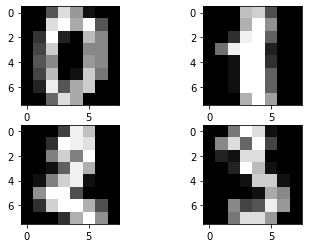

In [6]:
plt.gray()

plt.figure()

plt.subplot(2,2,1)
plt.imshow(digits_square[0])

plt.subplot(2,2,2)
plt.imshow(digits_square[1])

plt.subplot(2,2,3)
plt.imshow(digits_square[2])

plt.subplot(2,2,4)
plt.imshow(digits_square[3])

plt.show()


Now we can easily see that these are in fact numbers and they correspond to the digits in `target`.

Now, imagine a new person writes a new digit that is not in the dataset and we want to automatically predict what this digit is by looking just at the image. For this purpose, we must develop an algorithm that can tell us this.

Now, suppose we've written the algorithm, how do we test it without having the new images? Well, we can use the existing labels in order to know what the right answer is and then compare that to our algorithms answer. We will repeat the process for a random 30% of all digits and calculate the overall accuracy of our algorithm by: (correct answers)/(total).

In short, you need to create a function that takes N number of digits and outputs an ndarray of (N,) with the predictions for each digit, all of these will be compared against the real values.

In order to make this easier, we will only be comparing two classess of digits and classifing wether a digit is one of the two, you can choose which two digits to classify.

In [7]:
import random
import numpy as np

[[ 0.  0.  7. ... 11.  3.  0.]
 [ 0.  0.  6. ... 15.  6.  0.]
 [ 0.  0.  2. ...  0.  0.  0.]
 ...
 [ 0.  0.  5. ...  2.  0.  0.]
 [ 0.  4. 12. ...  6.  0.  0.]
 [ 0.  1. 13. ...  0.  0.  0.]]
[3 3 7 7 3 3 3 3 7 7 7 3 3 7 7 7 3 3 3 7 7 3 7 7 7 7 3 7 3 7 7 7 3 7 7 3 7
 3 3 3 3 7 7 7 7 7 3 7 3 7 3 3 7 7 3 3 3 3 3 7 7 3 7 3 7 3 3 3 3 3 7 3 7 3
 3 3 7 3 3 3 7 3 7 7 7 3 3 3 3 7 7 7 7 7 3 7 7 3 3 7 3 3 7 3 3 7]


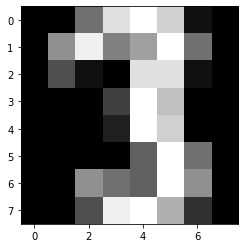

In [8]:
def generate_random_indices(percentage, class1, class2):
    indices_of_class1 = np.nonzero(target == class1)[0]
    indices_of_class2 = np.nonzero(target == class2)[0]

    min_length = min(len(indices_of_class1), len(indices_of_class2)) - 1

    indices_of_class = np.concatenate((indices_of_class1[:min_length], indices_of_class2[:min_length]))

    return random.sample(indices_of_class.tolist(),k=int(len(indices_of_class)*percentage))

def get_random_data(class1, class2):
    indices = generate_random_indices(0.3, class1, class2)
    return digits[indices,:], target[indices]

digits_sample, target_sample = get_random_data(7,3)
print(digits_sample)
print(target_sample)
plt.imshow(digits_sample.reshape((-1, 8, 8))[0])


Here we have applied some functions to extract a random 30% of the digits along with their target values, these digits will be the input to your algorithm, which you should complete below.

In [ ]:
def predict(digs): # TODO: Complete the function with an algorithm that must take digits and for each one return a multidimensional array containing the predicted labels
    return target_sample

We will now define the function that will calculate our accuracy.

In [ ]:
def accuracy(predictions):
    return np.count_nonzero(target_sample == predictions)/len(target_sample)

This function compares which predictions are equal to the real value and divides by the total in the sample. The following code will test your accuracy.

In [ ]:
accuracy(predict(digits_sample))

In [ ]:
#Instalar scikit learn
!pip install scikit-learn

In [9]:
import numpy

In [10]:
#Traer dataset con el cual trabajaremos para la imagen promedio
digitBase, targetBase = load_digits(return_X_y=True)


In [11]:
#Separamos el dataset por número, ahora tendremos datasets de un solo número
digit0 = digitBase[numpy.nonzero(target == 0)[0],:]
digit1 = digitBase[numpy.nonzero(target == 1)[0],:]
digit2 = digitBase[numpy.nonzero(target == 2)[0],:]
digit3 = digitBase[numpy.nonzero(target == 3)[0],:]
digit4 = digitBase[numpy.nonzero(target == 4)[0],:]
digit5 = digitBase[numpy.nonzero(target == 5)[0],:]
digit6 = digitBase[numpy.nonzero(target == 6)[0],:]
digit7 = digitBase[numpy.nonzero(target == 7)[0],:]
digit8 = digitBase[numpy.nonzero(target == 8)[0],:]
digit9 = digitBase[numpy.nonzero(target == 9)[0],:]


In [12]:
#Organizar los datos
digits_square0 = digit0.reshape(-1, 8, 8)
digits_square1 = digit1.reshape(-1, 8, 8)
digits_square2 = digit2.reshape(-1, 8, 8)
digits_square3 = digit3.reshape(-1, 8, 8)
digits_square4 = digit4.reshape(-1, 8, 8)
digits_square5 = digit5.reshape(-1, 8, 8)
digits_square6 = digit6.reshape(-1, 8, 8)
digits_square7 = digit7.reshape(-1, 8, 8)
digits_square8 = digit8.reshape(-1, 8, 8)
digits_square9 = digit9.reshape(-1, 8, 8)

In [13]:
#Presento como se ven 2 de las imagenes del dataset que contiene solo imagenes de digito 0
print(digits_square0[:2,])

[[[ 0.  0.  5. 13.  9.  1.  0.  0.]
  [ 0.  0. 13. 15. 10. 15.  5.  0.]
  [ 0.  3. 15.  2.  0. 11.  8.  0.]
  [ 0.  4. 12.  0.  0.  8.  8.  0.]
  [ 0.  5.  8.  0.  0.  9.  8.  0.]
  [ 0.  4. 11.  0.  1. 12.  7.  0.]
  [ 0.  2. 14.  5. 10. 12.  0.  0.]
  [ 0.  0.  6. 13. 10.  0.  0.  0.]]

 [[ 0.  0.  1.  9. 15. 11.  0.  0.]
  [ 0.  0. 11. 16.  8. 14.  6.  0.]
  [ 0.  2. 16. 10.  0.  9.  9.  0.]
  [ 0.  1. 16.  4.  0.  8.  8.  0.]
  [ 0.  4. 16.  4.  0.  8.  8.  0.]
  [ 0.  1. 16.  5.  1. 11.  3.  0.]
  [ 0.  0. 12. 12. 10. 10.  0.  0.]
  [ 0.  0.  1. 10. 13.  3.  0.  0.]]]


In [14]:
#Convertimos cada dataset a dataset numpy por que esa libreria tiene métodos para operar matrices más facil
digit0_np = numpy.array(digits_square0)
digit1_np = numpy.array(digits_square1)
digit2_np = numpy.array(digits_square2)
digit3_np = numpy.array(digits_square3)
digit4_np = numpy.array(digits_square4)
digit5_np = numpy.array(digits_square5)
digit6_np = numpy.array(digits_square6)
digit7_np = numpy.array(digits_square7)
digit8_np = numpy.array(digits_square8)
digit9_np = numpy.array(digits_square9)

In [15]:
#Retorna la matriz promedio de un número
#digitx_np: matriz que contiene imagenes de un unico digito
def identiticarImagenProm(digitx_np):
    matrizActual1 = 0
    for x in range(len(digitx_np)):
        matrizActual1 = matrizActual1 + digitx_np[x]
    matrizProm1 = matrizActual1/(len(digitx_np))
    matrizRedon1 = numpy.around(matrizProm1,decimals=1)
    return matrizRedon1


In [16]:
#Metodo para pintar la matriz promedio identificada
def pintarImagenProm(matrizRedondeada):
    import matplotlib.pyplot as pl
    pl.gray()
    pl.figure()
    pl.subplot(2,2,1)
    pl.imshow(matrizRedondeada)
    pl.show()

<Figure size 432x288 with 0 Axes>

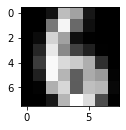

In [17]:

#Cantidad de imagenes, 178 imagenes. print(len(digit0_np))
#Dimensiones de cada imagen, 8x8. print(len(digit0_np[0]))

#MatrizaTrabajar: indicamos la matriz que contiene imagenes de un unico digito con la cual queremos trabajar
MatrizaTrabajar = digit6_np
identiticarImagenProm(MatrizaTrabajar)
pintarImagenProm(identiticarImagenProm(MatrizaTrabajar))


In [ ]:
def predecir(imgenesUser):
    digits_square_user = imgenesUser.reshape(-1, 8, 8)
    digit_np_user = numpy.array(digits_square_user)

In [ ]:
#El método del random que hizo el profe pero este los analiza todos en lugar de solo 2 digitos
def generate_random_indicesJM(percentage):
    #indices_of_class1 = np.nonzero(target == class1)[0]
    #indices_of_class2 = np.nonzero(target == class2)[0]

    ic0 = numpy.nonzero(target == 0)[0]
    ic1 = numpy.nonzero(target == 1)[0]
    ic2 = numpy.nonzero(target == 2)[0]
    ic3 = numpy.nonzero(target == 3)[0]
    ic4 = numpy.nonzero(target == 4)[0]
    ic5 = numpy.nonzero(target == 5)[0]
    ic6 = numpy.nonzero(target == 6)[0]
    ic7 = numpy.nonzero(target == 7)[0]
    ic8 = numpy.nonzero(target == 8)[0]
    ic9 = numpy.nonzero(target == 9)[0]

    min_length = min(len(ic0),len(ic1),len(ic2),len(ic3),
    len(ic4),len(ic5),len(ic6),len(ic7),len(ic8),len(ic9)) - 1

    ic = numpy.concatenate( (ic0[:min_length], ic1[:min_length], ic2[:min_length], ic3[:min_length], ic4[:min_length], ic5[:min_length], ic6[:min_length], ic7[:min_length], ic8[:min_length], ic9[:min_length]) )

    return random.sample(ic.tolist(),k=int(len(ic)*percentage))

def get_random_data1():
    indices = generate_random_indicesJM(0.3)
    return digitBase[indices,:], targetBase[indices]

digits_sample1, target_sample1 = get_random_data1()
print(digits_sample1)
print(target_sample1)
plt.imshow(digits_sample1.reshape((-1, 8, 8))[0])



In [ ]:
plt.gray()
plt.figure()
plt.subplot(2,2,1)
plt.imshow(digits_sample1.reshape((-1, 8, 8))[0])

plt.subplot(2,2,2)
plt.imshow(digits_sample1.reshape((-1, 8, 8))[1])

plt.subplot(2,2,3)
plt.imshow(digits_sample1.reshape((-1, 8, 8))[2])

plt.subplot(2,2,4)
plt.imshow(digits_sample1.reshape((-1, 8, 8))[3])

plt.show()